X shape: (1000, 7)
y shape: (1000,)
Linear Regression: R2 Score = 0.8804
Lasso: R2 Score = 0.8563
Ridge: R2 Score = 0.8806
K-Neighbors Regressor: R2 Score = 0.4748
Decision Tree: R2 Score = 0.7268
Random Forest Regressor: R2 Score = 0.8481
XGBRegressor: R2 Score = 0.8212
CatBoosting Regressor: R2 Score = 0.8516
AdaBoost Regressor: R2 Score = 0.8498

Best Model: Ridge (R2 Score = 0.8806)
Best Model: Ridge (R2 Score = 0.8806)


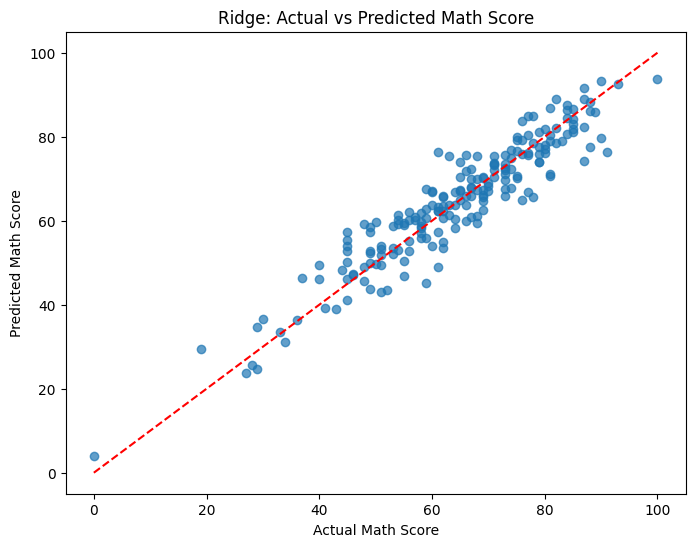

     Actual  Predicted  Difference
521      91  76.390187   14.609813
737      53  58.832013   -5.832013
740      80  76.995378    3.004622
660      74  76.825771   -2.825771
411      84  87.654545   -3.654545


In [ ]:
# Basic Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

df = pd.read_csv('data/stud.csv')
df.head()
# | index | gender | race_ethnicity | parental_level_of_education | lunch        | test_preparation_course | math_score | reading_score | writing_score |
# | ----- | ------ | -------------- | --------------------------- | ------------ | ----------------------- | ---------- | ------------- | ------------- |
# | 0     | female | group b        | bachelor's degree           | standard     | none                    | 72         | 72            | 74            |
# | 1     | female | group c        | some college                | standard     | completed               | 69         | 90            | 88            |
# | 2     | female | group b        | master's degree             | standard     | none                    | 90         | 95            | 93            |
# | 3     | male   | group a        | associate's degree          | free/reduced | none                    | 47         | 57            | 44            |
# | 4     | male   | group c        | some college                | standard     | none                    | 76         | 78            | 75            |

# Prepare X (features) and y (target)
X = df.drop(columns=['math_score'])  # Drop the target column to get features
X.head()
# | index | gender | race_ethnicity | parental_level_of_education | lunch        | test_preparation_course | reading_score | writing_score |
# | ----- | ------ | -------------- | --------------------------- | ------------ | ----------------------- | ------------- | ------------- |
# | 0     | female | group b        | bachelor's degree           | standard     | none                    | 72            | 74            |
# | 1     | female | group c        | some college                | standard     | completed               | 90            | 88            |
# | 2     | female | group b        | master's degree             | standard     | none                    | 95            | 93            |
# | 3     | male   | group a        | associate's degree          | free/reduced | none                    | 57            | 44            |
# | 4     | male   | group c        | some college                | standard     | none                    | 78            | 75            |

y = df['math_score']                 # Target variable
y.head()
# 0    72
# 1    69
# 2    90
# 3    47
# 4    76

# # Optional: Check the shapes
print("X shape:", X.shape)
print("y shape:", y.shape)
# X shape: (1000, 7)
# y shape: (1000,)

# Create Column Transformer with 3 types of transformers
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Identify numerical and categorical columns
numerical_features = ['reading_score', 'writing_score']
categorical_features = [
    'gender',
    'race_ethnicity',
    'parental_level_of_education',
    'lunch',
    'test_preparation_course'
]

# Numerical pipeline: impute missing values and scale
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')), ## Fill missing numbers with the median
    ('scaler', StandardScaler())                   ## Standardize values (mean=0, std=1)  
])

# Categorical pipeline: impute missing values, one-hot encode, and scale
cat_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')), ## Fill missing text with the most common value
    ('onehot', OneHotEncoder()),                          ## Convert categories to numbers (binary flags)
    ('scaler', StandardScaler(with_mean=False))           ## Scale these binary values
])

# Combine pipelines into a ColumnTransformer
preprocessor = ColumnTransformer([
    ('num', num_pipeline, numerical_features),
    ('cat', cat_pipeline, categorical_features)
])

# Fit and transform your data (example)
X = preprocessor.fit_transform(X)
X.shape
# (1000, 19)

# Separate dataset based on test and training dataset 
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape
# (800, 19)
X_test.shape
#(200, 19)
Y_train.shape
# (800,)
Y_test.shape
# (200,)

# Train on these model and pick the best model
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
# %pip install xgboost
from xgboost import XGBRegressor
# %pip install catboost
from catboost import CatBoostRegressor
from sklearn.metrics import r2_score

models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(verbosity=0),
    "CatBoosting Regressor": CatBoostRegressor(verbose=0),
    "AdaBoost Regressor": AdaBoostRegressor()
}

results = {}

for name, model in models.items():
    model.fit(X_train, Y_train)
    y_pred = model.predict(X_test)
    score = r2_score(Y_test, y_pred)
    results[name] = score
    print(f"{name}: R2 Score = {score:.4f}")
# Linear Regression: R2 Score = 0.8804
# Lasso: R2 Score = 0.8563
# Ridge: R2 Score = 0.8806
# K-Neighbors Regressor: R2 Score = 0.4748
# Decision Tree: R2 Score = 0.7366
# Random Forest Regressor: R2 Score = 0.8557
# XGBRegressor: R2 Score = 0.8212
# CatBoosting Regressor: R2 Score = 0.8516
# AdaBoost Regressor: R2 Score = 0.8530


best_model_name = max(results, key=results.get)
print(f"\nBest Model: {best_model_name} (R2 Score = {results[best_model_name]:.4f})")
# Best Model: Ridge (R2 Score = 0.8806)


# 1. Find the best model and its predictions
best_model = models[best_model_name]
y_pred = best_model.predict(X_test)


# 3. Plot predicted vs actual values
plt.figure(figsize=(8, 6))
plt.scatter(Y_test, y_pred, alpha=0.7)
plt.xlabel("Actual Math Score")
plt.ylabel("Predicted Math Score")
plt.title(f"{best_model_name}: Actual vs Predicted Math Score")
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'r--')  # Diagonal line
plt.show()

# 4. Show the difference between actual and predicted values
diff_df = pd.DataFrame({
    'Actual': Y_test,
    'Predicted': y_pred,
    'Difference': Y_test - y_pred
})
print(diff_df.head())
# Actual  Predicted  Difference
# 521      91  76.390187   14.609813
# 737      53  58.832013   -5.832013
# 740      80  76.995378    3.004622
# 660      74  76.825771   -2.825771
# 411      84  87.654545   -3.654545


